<a href="https://colab.research.google.com/github/perses08/Brain_Tumor_Seg/blob/main/Vizualizing_3D_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Data visualization 

In [64]:
import os 
import nibabel as nib #is for loading nifti images
import matplotlib.pyplot as plt
from  ipywidgets import interact,interactive
import numpy as np

##This is data set is from  [Medical Segmentation Decathlon ](https://decathlon-10.grand-challenge.org/)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
os.listdir('/content/drive/MyDrive/')

['Colab Notebooks', 'Task01_BrainTumour.tar', '.ipynb_checkpoints']

In [20]:
!tar xf '/content/drive/MyDrive/Task01_BrainTumour.tar'

In [58]:
os.listdir('Task01_BrainTumour/')

['._imagesTr',
 'imagesTs',
 '._dataset.json',
 '._labelsTr',
 'imagesTr',
 'dataset.json',
 '._imagesTs',
 'labelsTr']

In [25]:
img_path = 'Task01_BrainTumour/imagesTr/BRATS_001.nii.gz'

In [28]:
img = nib.load(img_path)
img_data = img.get_fdata()
img_data.shape

(240, 240, 155, 4)

(-0.5, 239.5, 239.5, -0.5)

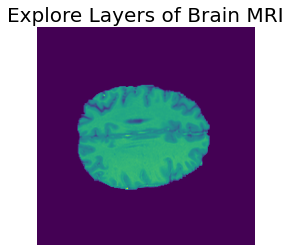

In [42]:
plt.imshow(img_data[:, :, 105,1 ])
plt.imshow(img_data[:, :, 105, 2])
plt.title('Explore Layers of Brain MRI', fontsize=20)
plt.axis('off')

In [46]:
#interactive visualization with Ipython_Widgets
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 1
    plt.imshow(img_data[:, :, layer, channel], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, img_data.shape[2] - 1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [59]:
label_path = 'Task01_BrainTumour/labelsTr/BRATS_001.nii.gz'

In [60]:
label = nib.load(label_path)
label_data = label.get_fdata()
label_data.shape

(240, 240, 155)

In [62]:
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    plt.imshow(label_data[:, :, layer], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

interact(explore_3dimage, layer=(0, label_data.shape[2] - 1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

(240, 240)
(240, 240)
(240, 240)
(240, 240)


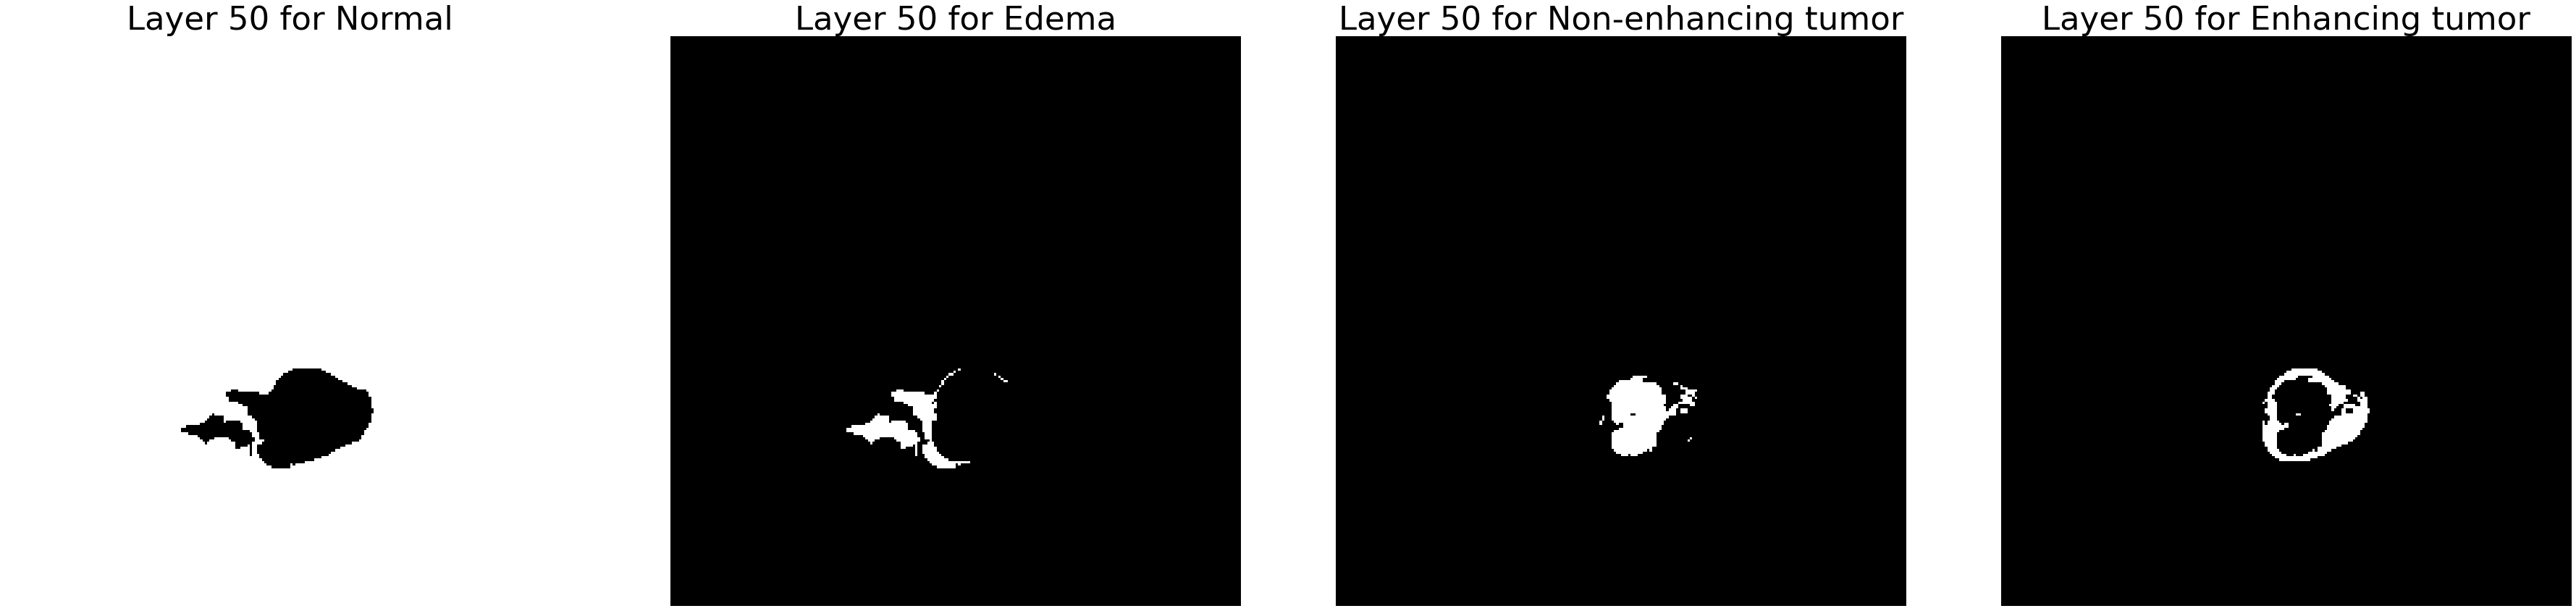

In [68]:
layer = 50
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_data[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 255, 0)
    print(mask.shape)
    ax[i].imshow(mask, cmap='gray')
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()